In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse



In [2]:
data=pd.read_csv("/content/car_purchasing.csv",encoding='ISO-8859-1')


In [3]:
data.describe()


,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


from matplotlib import pyplot as plt
_df_0['gender'].plot(kind='hist', bins=20, title='gender')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['annual Salary'].plot(kind='hist', bins=20, title='annual Salary')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['credit card debt'].plot(kind='hist', bins=20, title='credit card debt')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='gender', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='age', y='annual Salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='annual Salary', y='credit card debt', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='credit card debt', y='net worth', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['gender'].plot(kind='line', figsize=(8, 4), title='gender')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['annual Salary'].plot(kind='line', figsize=(8, 4), title='annual Salary')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['credit card debt'].plot(kind='line', figsize=(8, 4), title='credit card debt')
plt.gca().spines[['top', 'right']].set_visible(False)

In [4]:
data.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [5]:
print(f'we have {data.shape[0]} rows and {data.shape[1]} colums')


we have 500 rows and 9 colums


In [6]:
data.columns=[i.lower().replace(" ","_") for i in data.columns]

In [7]:
b=data.isnull().sum().to_list()
d=sum(b)
if d==0:
  print("Data frame contains no Null values")
else:
  print(f"{d}NaN values exits")


Data frame contains no Null values


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_name        500 non-null    object 
 1   customer_e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual_salary        500 non-null    float64
 6   credit_card_debt     500 non-null    float64
 7   net_worth            500 non-null    float64
 8   car_purchase_amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [9]:
da=data.copy()
sa=da.duplicated(keep='first')
da=da[~sa]
print(f"The duplicate data amounts to {round((data.shape[0]-da.shape[0])/data.shape[0],4)*100}% of our database")


The duplicate data amounts to 0.0% of our database


In [10]:

for i in data.columns:
  print(f"{i.upper()}\n{'-'*10}\n{data[i].sample(n=5,random_state=4)}\n{'.'*30}\n")

CUSTOMER_NAME
----------
66           Yuli Craig
152       Rashad Harper
123      Merrill Bailey
285    Kirestin F. Yang
70        Owen Jacobson
Name: customer_name, dtype: object
..............................

CUSTOMER_E-MAIL
----------
66       lobortis.quis.pede@Seddiam.com
152             auctor@arcuimperdiet.ca
123       natoque.penatibus@nislsem.net
285     eleifend.egestas.Sed@tempus.net
70     ac.orci@Etiamimperdietdictum.edu
Name: customer_e-mail, dtype: object
..............................

COUNTRY
----------
66                 Germany
152            Timor-Leste
123                Ecuador
285           South Africa
70     Palestine, State of
Name: country, dtype: object
..............................

GENDER
----------
66     0
152    0
123    0
285    1
70     1
Name: gender, dtype: int64
..............................

AGE
----------
66     55.270306
152    31.741630
123    47.145467
285    52.775696
70     45.185438
Name: age, dtype: float64
.............................

In [11]:
data.columns

Index(['customer_name', 'customer_e-mail', 'country', 'gender', 'age',
       'annual_salary', 'credit_card_debt', 'net_worth',
       'car_purchase_amount'],
      dtype='object')

1    253
0    247
Name: gender, dtype: int64


<Axes: >

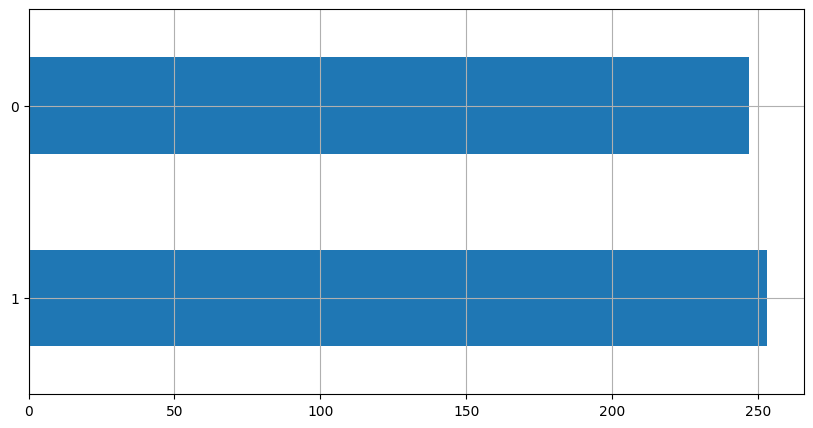

In [12]:
gender_data=data.gender.value_counts()
print(gender_data)
gender_data.plot(kind='barh',grid=True,figsize=(10,5))


In [13]:
print(f"we have customers from toatal of{len(data.country.unique())} countries")

we have customers from toatal of211 countries


In [14]:
c=data.country.value_counts().head(10).sort_values()
c

Greenland           5
Saint Barthélemy    5
Guinea              5
Iraq                5
Samoa               5
Liechtenstein       5
Bhutan              5
Israel              6
Mauritania          6
Bolivia             6
Name: country, dtype: int64

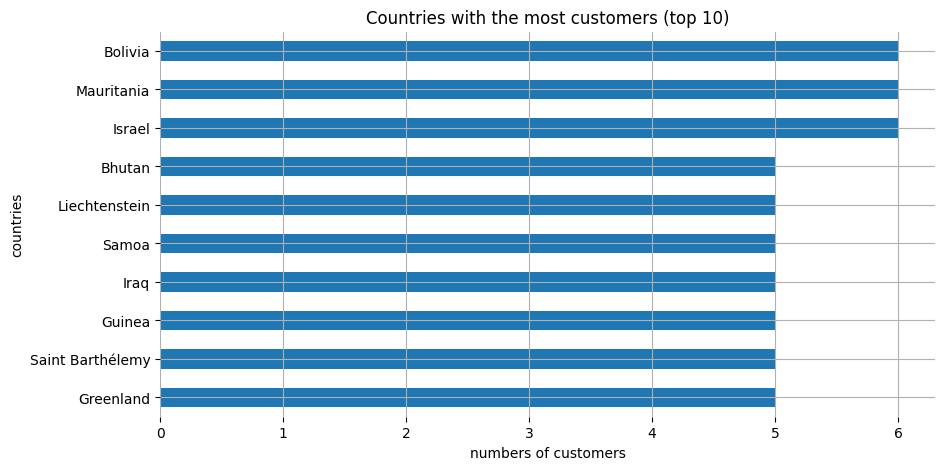

In [15]:

c.plot(kind='barh',figsize=(10,5),grid=True)
plt.title("Countries with the most customers (top 10)")
plt.ylabel("countries")
plt.xlabel("numbers of customers")
plt.box(False)
plt.show()

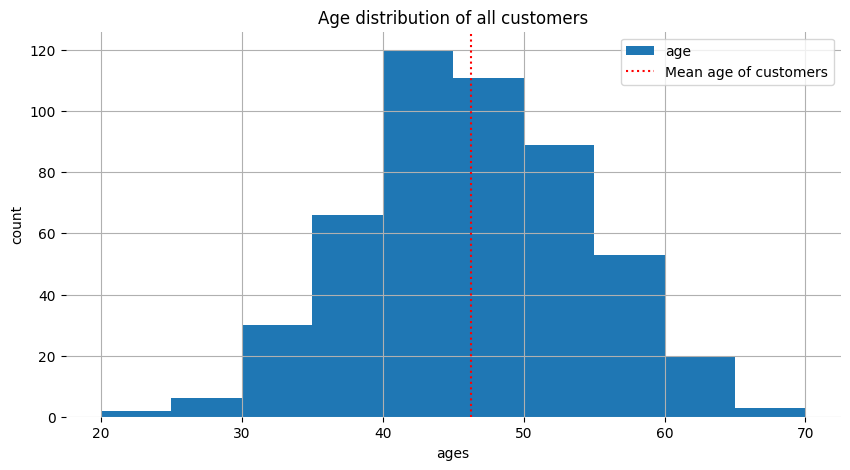

In [16]:
data['age'].plot(kind='hist',grid=True,bins=10,legend=None,figsize=(10,5))
plt.axvline(x=np.mean(data.age),c='red',ls=':',label='Mean age of customers')
plt.legend()
plt.title("Age distribution of all customers")
plt.box(False)
plt.xlabel('ages')
plt.ylabel('count')
plt.show()


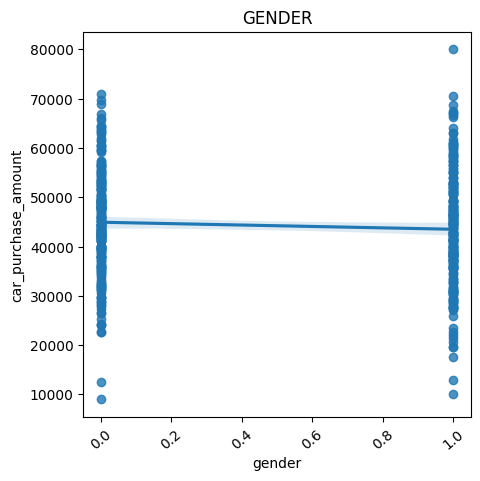

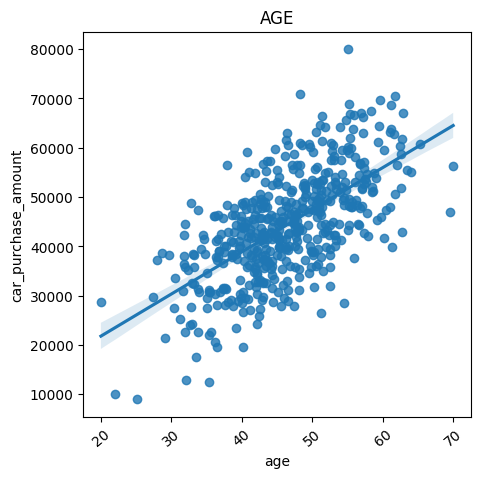

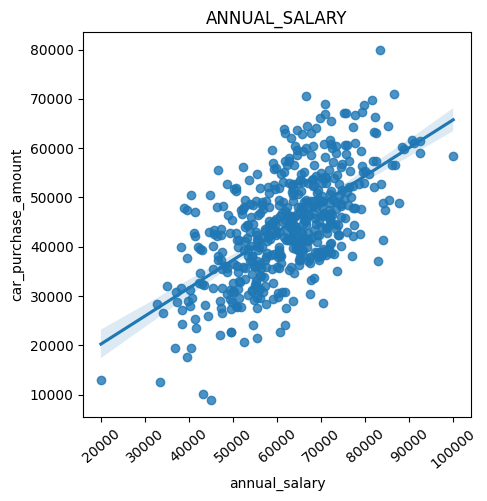

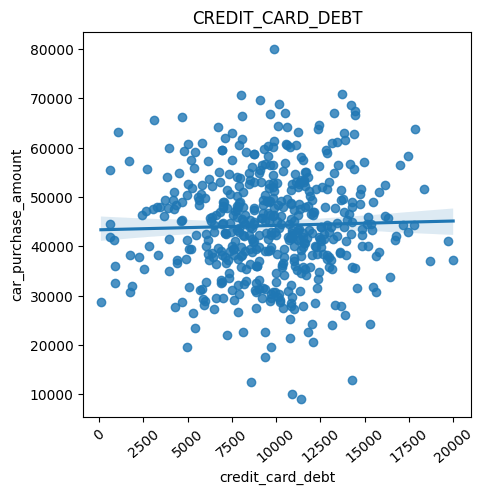

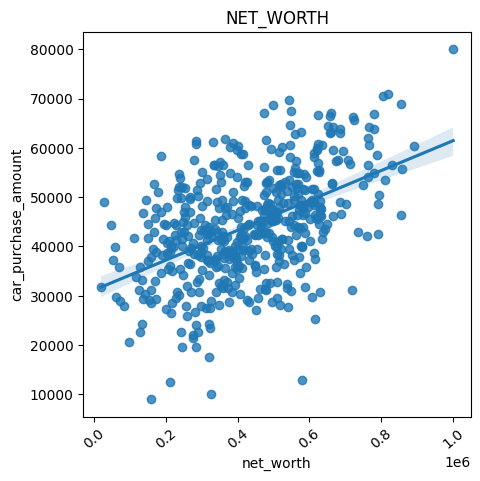

In [18]:
column_lst=['gender','age','annual_salary','credit_card_debt','net_worth','car_purchase_amount']
for i in range(len(column_lst[:-1])):
  a=plt.subplots(figsize=(5,5))
  sns.regplot(data=data,x=column_lst[i],y=column_lst[-1])
  plt.xticks(rotation=40)
  plt.title(column_lst[i].upper())


In [19]:
x=data[column_lst[:-1]]
y=data['car_purchase_amount']
train_x,val_x,train_y,val_y=train_test_split(x,y,test_size=0.1,random_state=4)

In [20]:
lm= LinearRegression()
lm.fit(train_x,train_y)
m1=lm.predict(val_x)
m1


array([48103.37128037, 42355.40217478, 51402.27520085, 50442.38714956,
       30840.46612821, 34677.28226091, 38400.28815387, 49247.43509121,
       27301.04547063, 42289.73216433, 33637.75800693, 38183.00238349,
       12895.08703297, 24182.84539465, 34137.7439247 , 41490.57796918,
       41452.81914301, 23519.45601697, 41319.78306313, 41027.74478008,
       44437.07258358, 47969.61901253, 33425.62289435, 42371.77083907,
       48100.28510167, 45823.88158942, 48011.65907351, 57124.94568796,
       38547.00950993, 61119.49756483, 44386.91602166, 52707.0831261 ,
       34802.19234321, 63138.03574063, 43642.59243649, 53657.94658704,
       55377.0400167 , 36126.88562248, 41674.56585083, 37365.76861631,
       28465.01990322, 37843.81385588, 44846.07970415, 45108.43620662,
       42774.39978728, 46013.08552453, 53497.75146941, 53047.9190122 ,
       44634.35653217, 12538.34421251])

In [21]:

rf=RandomForestRegressor()
rf.fit(train_x,train_y)
m2=rf.predict(val_x)
m2

array([48961.5461174, 42525.3465765, 51297.4573616, 48027.8259794,
       30601.0038775, 38038.0338105, 39798.6137845, 49010.6303694,
       28536.6302956, 40959.87067  , 35703.6681896, 39210.8475442,
       28447.9974288, 28575.9964959, 35209.2806411, 41390.9440277,
       42755.9538204, 23824.9807964, 41797.0085432, 41062.2418651,
       45064.1668257, 47542.7136776, 32561.5979934, 42135.9213423,
       47352.5890633, 44526.9506579, 46543.0533364, 56319.5229243,
       38740.4135644, 57724.137259 , 41901.650638 , 51832.2286888,
       33550.5394198, 61017.2892163, 43464.9328642, 54486.0276427,
       54147.8121662, 35325.2301763, 42485.3610409, 38207.5324822,
       37120.1238813, 35966.8450487, 42404.533005 , 45452.9676307,
       43593.4518129, 46509.5855852, 54669.3364161, 53823.6504556,
       41489.3856649, 20749.4315463])

In [22]:
dt=DecisionTreeRegressor()
dt.fit(train_x,train_y)
m3=dt.predict(val_x)
m3

array([47984.42062, 28645.39425, 52654.40455, 49442.12107, 27815.73813,
       40589.8625 , 44463.30502, 49730.53339, 29425.83001, 51922.07691,
       40879.19107, 37161.55393, 25252.93221, 37744.54285, 35475.00344,
       41137.89459, 42497.72862, 28925.70549, 44424.07681, 42011.19965,
       45167.32542, 48300.02057, 27815.73813, 41567.47033, 42297.5062 ,
       43855.06077, 45208.42539, 53848.7555 , 35139.24793, 53848.7555 ,
       42793.9932 , 51683.60859, 36019.9556 , 58045.56257, 40004.87142,
       54387.27727, 50702.18103, 35784.42411, 39911.6116 , 30757.65726,
       37714.31659, 35848.82935, 39904.81613, 49258.87571, 44650.36073,
       45112.94547, 54850.38742, 51730.17434, 42793.9932 , 17584.56963])

In [23]:

ls=Lasso()
ls.fit(train_x,train_y)
m4=ls.predict(val_x)
m4

array([48103.24308513, 42355.6545339 , 51402.27558756, 50442.26031508,
       30840.46679853, 34677.33383438, 38400.48316213, 49247.31819807,
       27301.11442593, 42289.60231862, 33637.99520176, 38183.20484932,
       12895.30426397, 24183.07951913, 34137.78999691, 41490.71773741,
       41453.02834844, 23519.54674664, 41319.67123946, 41027.79473664,
       44437.06249513, 47969.45436469, 33425.63683319, 42371.78163972,
       48100.12036123, 45823.92198156, 48011.6628327 , 57124.75849551,
       38547.1854491 , 61119.27431001, 44386.84015443, 52706.88954416,
       34802.28395804, 63137.81646197, 43642.5559613 , 53657.77580393,
       55377.10728346, 36126.95495034, 41674.35388578, 37365.85879312,
       28464.89859881, 37843.73706484, 44846.0756261 , 45108.41240306,
       42774.47034213, 46013.09304205, 53497.68898   , 53047.86219679,
       44634.24571431, 12538.53055809])

In [24]:

rd=Ridge()
rd.fit(train_x,train_y)
m5=rd.predict(val_x)
m5


array([48103.11589557, 42355.85011472, 51402.2586071 , 50442.17328395,
       30840.48490605, 34677.39480554, 38400.66698039, 49247.23734755,
       27301.15488704, 42289.51059193, 33638.21431059, 38183.39287575,
       12895.50536227, 24183.25802255, 34137.81025106, 41490.85447524,
       41453.18576852, 23519.6425359 , 41319.5579041 , 41027.85438418,
       44437.0744214 , 47969.33344009, 33425.66602204, 42371.80784794,
       48099.96371935, 45823.97441232, 48011.64970242, 57124.61721371,
       38547.35146276, 61119.10286291, 44386.75601277, 52706.74447608,
       34802.34261089, 63137.61313507, 43642.54338046, 53657.61397246,
       55377.14608094, 36127.03167808, 41674.15585862, 37365.95418079,
       28464.77739667, 37843.65530959, 44846.09035824, 45108.41069228,
       42774.5477001 , 46013.11824349, 53497.61778516, 53047.79634293,
       44634.17094101, 12538.66975791])

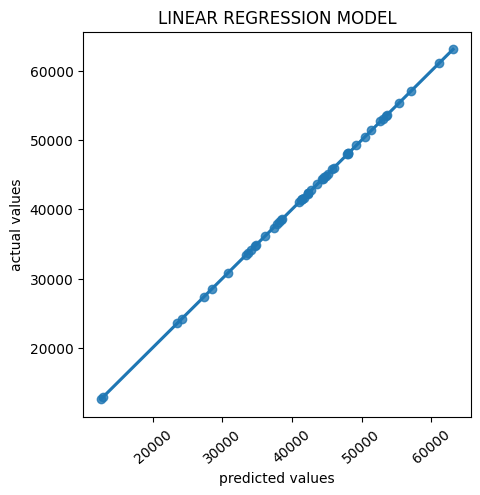

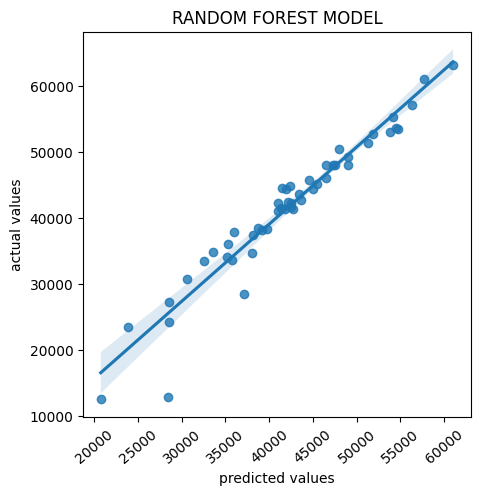

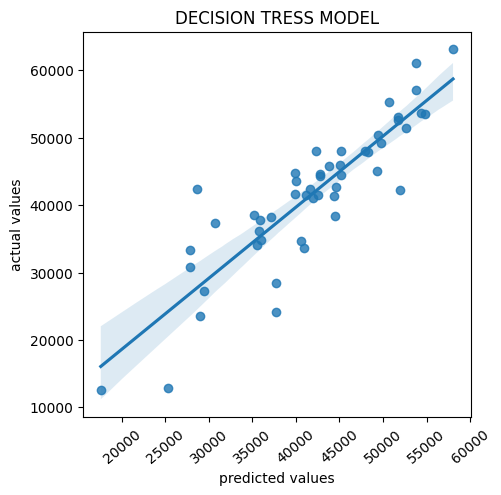

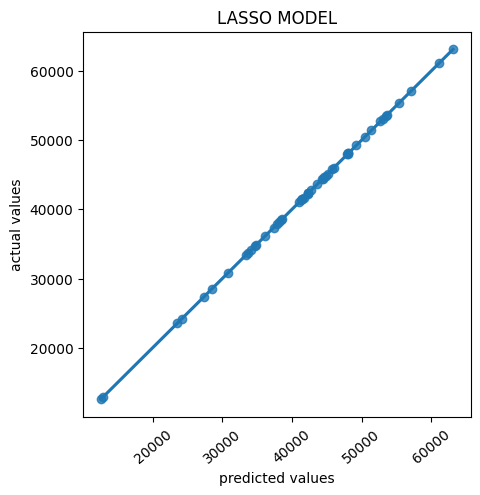

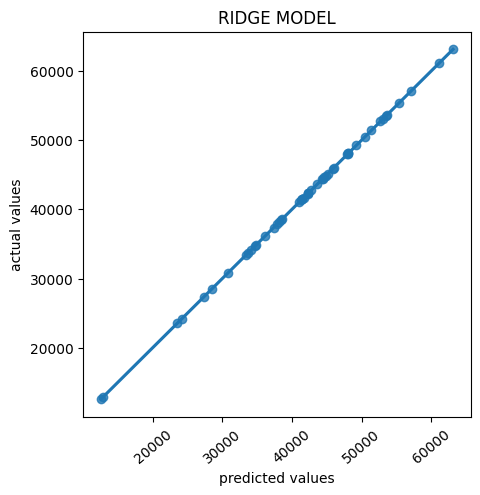

In [26]:
model_lst=[m1,m2,m3,m4,m5]
model_names=['linear regression','random forest',"Decision Tress",'lasso','ridge']
for i in range(len(model_names)):
  ax=plt.subplots(figsize=[5,5])
  sns.regplot(x=model_lst[i],y=val_y)
  plt.xticks(rotation=40)
  plt.title(model_names[i].upper()+" MODEL")
  plt.xlabel("predicted values")
  plt.ylabel("actual values")